# Neural Collaborative Filtering

## Embeddings

In [8]:
from keras.utils import to_categorical

# We have 10 users, each is uniquely identified by an ID.
users = [i for i in range(10)]
to_categorical(users)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [9]:
import numpy as np

latent_dim = 5
inputs = to_categorical(users)
embed_mat = np.random.randn(len(users), latent_dim)

inputs.dot(embed_mat)

array([[ 1.15644865,  1.24077277,  0.33416242, -1.77791525,  2.06496681],
       [ 0.76095914, -1.49558613,  1.80663878,  1.3187996 , -0.77627254],
       [-0.90068986,  1.95252227,  1.03778883, -1.31630376,  1.56790967],
       [ 0.8488995 ,  1.55240984, -0.07987439,  1.63482424, -0.66901563],
       [-1.5231885 , -1.33469689, -0.3371719 , -0.92512661, -0.05227158],
       [-1.94572025, -1.40318555, -2.19075116, -0.11856971, -0.08497444],
       [ 0.07435127,  0.08204615, -2.99413399,  0.4052439 ,  0.27134257],
       [-0.28845673,  0.58127673,  0.19776896, -0.67492824, -0.9925635 ],
       [-2.82720903,  2.09151637,  0.70979302,  1.40121967, -0.97844057],
       [ 1.00587023, -0.6992918 ,  0.35919515,  1.01446591,  0.23949187]])

## Dataset: Movie Ratings

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('/content/drive/MyDrive/AInstein/ml-100k/ml-100k/u.data', delimiter='\t', header=0, names=['user_id', 'movie_id', 'rating', 'timestamp'])

# Need to map movie ID to [1, num_movies]
movie_id_to_new_id = dict()
id = 1
for index, row in dataset.iterrows():
    if movie_id_to_new_id.get(row['movie_id']) is None:
        movie_id_to_new_id[row['movie_id']] = id
        dataset.at[index, 'movie_id'] = id
        id += 1
    else:
        dataset.at[index, 'movie_id'] = movie_id_to_new_id.get(row['movie_id'])

num_users = len(dataset.user_id.unique())
num_movies = len(dataset.movie_id.unique())
train, test = train_test_split(dataset, test_size=0.2)

print ('Number of movies', num_movies)
print ('Number of users', num_users)

Number of movies 1682
Number of users 943


In [15]:
train.head()

,user_id,movie_id,rating,timestamp
13013,227,1070,4,879035431
30916,326,469,2,879877326
79018,563,10,5,880506596
6240,354,300,3,891218116
11480,289,87,5,876789843


In [16]:
test.head()

,user_id,movie_id,rating,timestamp
69880,551,608,1,892785364
43770,20,578,5,879668713
74343,568,983,3,877907157
28716,406,47,2,880131792
75153,521,369,3,885253844


## Generalized Matrix Factorization (GMF)

### Matrix Factorization

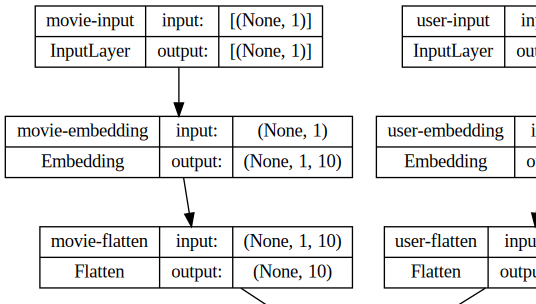

In [19]:
from keras.models import Model, Sequential
from keras.layers import Embedding, Flatten, Input, Dot
from keras.utils import model_to_dot
from IPython.display import SVG

# Let's use a higher latent dimension.
latent_dim = 10

movie_input = Input(shape=[1],name='movie-input')
movie_embedding = Embedding(num_movies + 1, latent_dim, name='movie-embedding')(movie_input)
movie_vec = Flatten(name='movie-flatten')(movie_embedding)

user_input = Input(shape=[1],name='user-input')
user_embedding = Embedding(num_users + 1, latent_dim, name='user-embedding')(user_input)
user_vec = Flatten(name='user-flatten')(user_embedding)

prod = Dot(axes=1, name='dot-product')([movie_vec, user_vec])

model = Model([user_input, movie_input], prod)
model.compile('adam', 'mean_squared_error')

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 movie-input (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 user-input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 movie-embedding (Embedding  (None, 1, 10)                16830     ['movie-input[0][0]']         
 )                                                                                                
                                                                                                  
 user-embedding (Embedding)  (None, 1, 10)                9440      ['user-input[0][0]']      

Epoch 1/10
2500/2500 [==============================] - 9s 3ms/step - loss: 10.1605
Epoch 2/10
2500/2500 [==============================] - 6s 2ms/step - loss: 2.0046
Epoch 3/10
2500/2500 [==============================] - 6s 2ms/step - loss: 1.1235
Epoch 4/10
2500/2500 [==============================] - 6s 2ms/step - loss: 0.9578
Epoch 5/10
2500/2500 [==============================] - 6s 2ms/step - loss: 0.9067
Epoch 6/10
2500/2500 [==============================] - 6s 2ms/step - loss: 0.8854
Epoch 7/10
2500/2500 [==============================] - 6s 2ms/step - loss: 0.8724
Epoch 8/10
2500/2500 [==============================] - 6s 2ms/step - loss: 0.8615
Epoch 9/10
2500/2500 [==============================] - 6s 2ms/step - loss: 0.8528
Epoch 10/10
2500/2500 [==============================] - 6s 2ms/step - loss: 0.8437


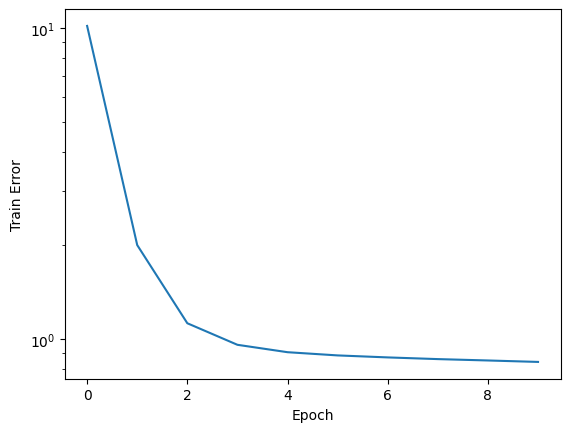

625/625 [==============================] - 1s 1ms/step


0.7557259991147556

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
history = model.fit([train.user_id, train.movie_id], train.rating, epochs =10)
pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.show()

y_hat = np.round(model.predict([test.user_id, test.movie_id]), decimals=2)
y_true = test.rating
mean_absolute_error(y_true, y_hat)

In [24]:
from keras.constraints import non_neg

latent_dim = 5

movie_input = Input(shape=[1],name='movie-input')
movie_embedding = Embedding(num_movies + 1, latent_dim, name='movie-embedding',
                                                        embeddings_constraint=non_neg())(movie_input)
movie_vec = Flatten(name='movie-flatten')(movie_embedding)

user_input = Input(shape=[1],name='user-input')
user_embedding = Embedding(num_users + 1, latent_dim, name='user-embedding',
                                                      embeddings_constraint=non_neg())(user_input)
user_vec = Flatten(name='user-flatten')(user_embedding)

prod = Dot(axes=1, name='dot-product')([movie_vec, user_vec])

model = Model([user_input, movie_input], prod)
model.compile('adam', 'mean_squared_error')

### Neural Network with MF

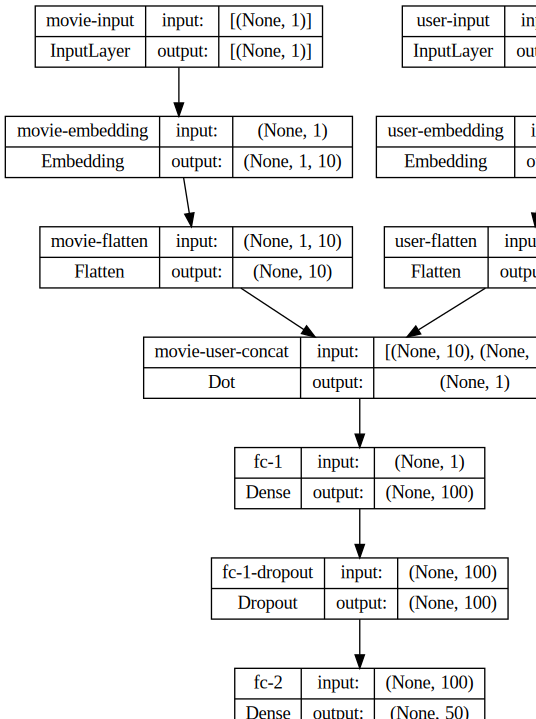

In [30]:
from keras.models import Model, Sequential
from keras.layers import Embedding, Flatten, Input, Dot, Dropout, Dense
from keras.optimizers import Adam
from keras.utils import model_to_dot
from IPython.display import SVG

latent_dim = 10

movie_input = Input(shape=[1],name='movie-input')
movie_embedding = Embedding(num_movies + 1, latent_dim, name='movie-embedding')(movie_input)
movie_vec = Flatten(name='movie-flatten')(movie_embedding)

user_input = Input(shape=[1],name='user-input')
user_embedding = Embedding(num_users + 1, latent_dim, name='user-embedding')(user_input)
user_vec = Flatten(name='user-flatten')(user_embedding)

concat = Dot(axes=1, name='movie-user-concat')([movie_vec, user_vec])
concat_dropout = Dropout(0.2)(concat)
fc_1 = Dense(100, name='fc-1', activation='relu')(concat)
fc_1_dropout = Dropout(0.2, name='fc-1-dropout')(fc_1)
fc_2 = Dense(50, name='fc-2', activation='relu')(fc_1_dropout)
fc_2_dropout = Dropout(0.2, name='fc-2-dropout')(fc_2)
fc_3 = Dense(1, name='fc-3', activation='relu')(fc_2_dropout)


model = Model([user_input, movie_input], fc_3)
model.compile(optimizer=Adam(lr=0.1), loss='mean_squared_error')
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [31]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 movie-input (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 user-input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 movie-embedding (Embedding  (None, 1, 10)                16830     ['movie-input[0][0]']         
 )                                                                                                
                                                                                                  
 user-embedding (Embedding)  (None, 1, 10)                9440      ['user-input[0][0]']    

Epoch 1/10
2500/2500 [==============================] - 11s 4ms/step - loss: 1.5736
Epoch 2/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.9579
Epoch 3/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.8095
Epoch 4/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.7306
Epoch 5/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6856
Epoch 6/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6479
Epoch 7/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6226
Epoch 8/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6059
Epoch 9/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.5898
Epoch 10/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.5772


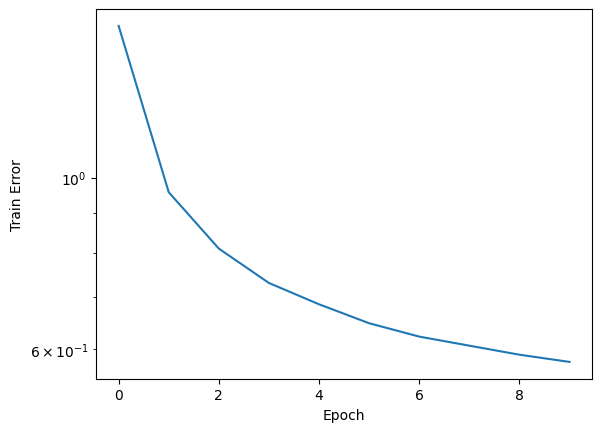

625/625 [==============================] - 1s 1ms/step


0.7751620011001825

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
history = model.fit([train.user_id, train.movie_id], train.rating, epochs=10)
pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.show()

y_hat = np.round(model.predict([test.user_id, test.movie_id]), decimals=2)
y_true = test.rating
mean_absolute_error(y_true, y_hat)

## Multi-Layer Perceptron

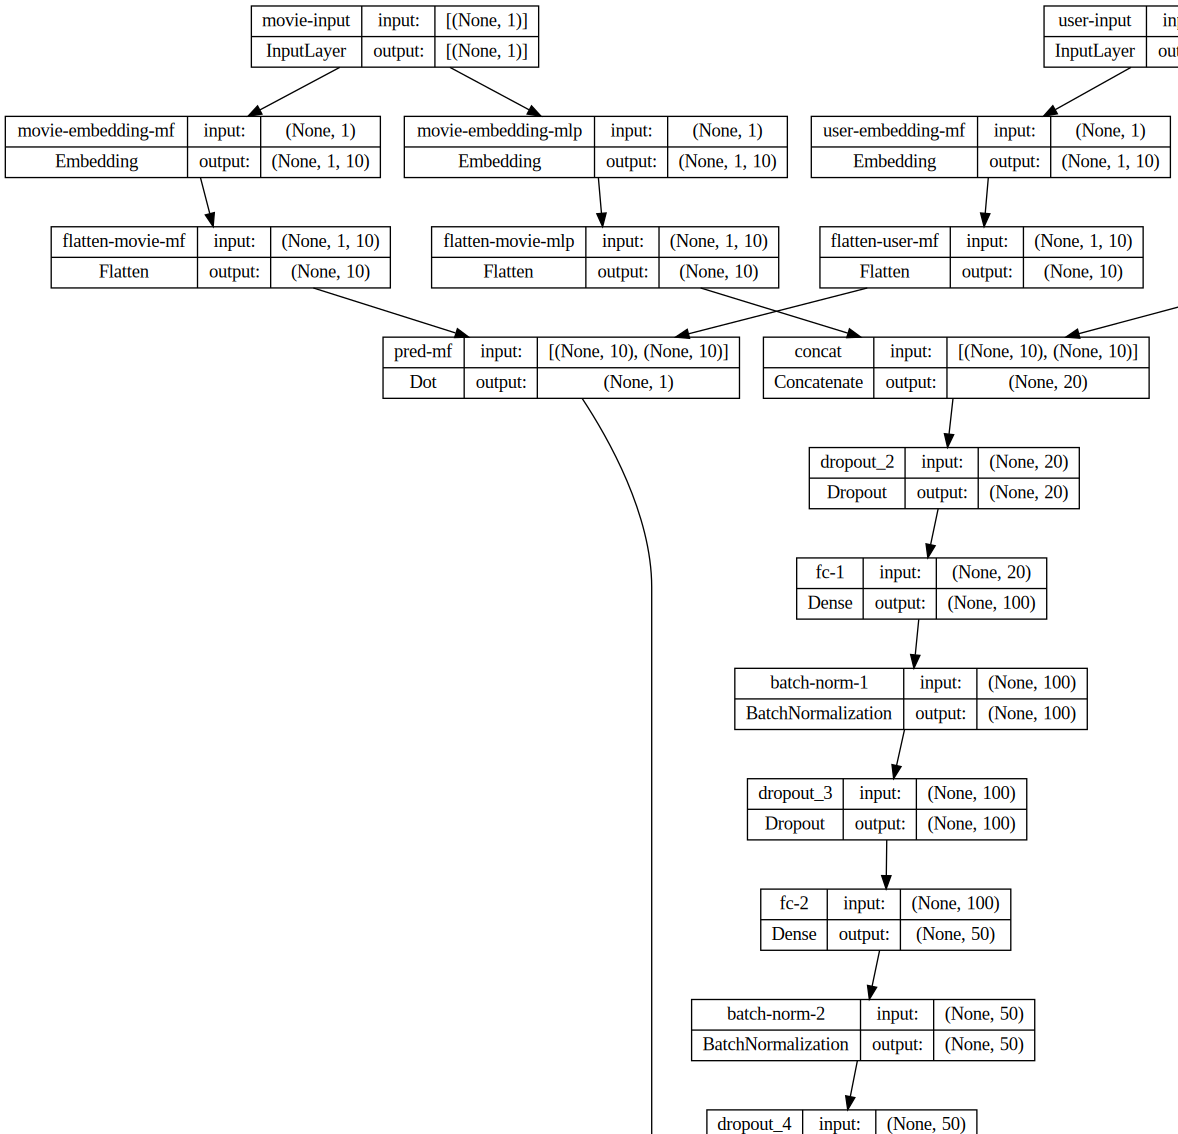

In [34]:
from keras.models import Model, Sequential
from keras.layers import Embedding, Flatten, Input, Concatenate, Dot, Dropout, Dense, BatchNormalization
from keras.optimizers import Adam
from keras.utils import model_to_dot
from IPython.display import SVG

latent_dim = 10

# Define inputs
movie_input = Input(shape=[1],name='movie-input')
user_input = Input(shape=[1], name='user-input')

# MLP Embeddings
movie_embedding_mlp = Embedding(num_movies + 1, latent_dim, name='movie-embedding-mlp')(movie_input)
movie_vec_mlp = Flatten(name='flatten-movie-mlp')(movie_embedding_mlp)

user_embedding_mlp = Embedding(num_users + 1, latent_dim, name='user-embedding-mlp')(user_input)
user_vec_mlp = Flatten(name='flatten-user-mlp')(user_embedding_mlp)

# MF Embeddings
movie_embedding_mf = Embedding(num_movies + 1, latent_dim, name='movie-embedding-mf')(movie_input)
movie_vec_mf = Flatten(name='flatten-movie-mf')(movie_embedding_mf)

user_embedding_mf = Embedding(num_users + 1, latent_dim, name='user-embedding-mf')(user_input)
user_vec_mf = Flatten(name='flatten-user-mf')(user_embedding_mf)

# MLP layers
concat = Concatenate(name='concat')([movie_vec_mlp, user_vec_mlp])
concat_dropout = Dropout(0.2)(concat)
fc_1 = Dense(100, name='fc-1', activation='relu')(concat_dropout)
fc_1_bn = BatchNormalization(name='batch-norm-1')(fc_1)
fc_1_dropout = Dropout(0.2)(fc_1_bn)
fc_2 = Dense(50, name='fc-2', activation='relu')(fc_1_dropout)
fc_2_bn = BatchNormalization(name='batch-norm-2')(fc_2)
fc_2_dropout = Dropout(0.2)(fc_2_bn)

# Prediction from both layers
pred_mlp = Dense(10, name='pred-mlp', activation='relu')(fc_2_dropout)
pred_mf = Dot(axes=1, name='pred-mf')([movie_vec_mf, user_vec_mf])
combine_mlp_mf = Concatenate(name='combine-mlp-mf')([pred_mf, pred_mlp])

# Final prediction
result = Dense(1, name='result', activation='relu')(combine_mlp_mf)

model = Model([user_input, movie_input], result)
model.compile(optimizer=Adam(lr=0.01), loss='mean_absolute_error')
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [35]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 movie-input (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 user-input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 movie-embedding-mlp (Embed  (None, 1, 10)                16830     ['movie-input[0][0]']         
 ding)                                                                                            
                                                                                                  
 user-embedding-mlp (Embedd  (None, 1, 10)                9440      ['user-input[0][0]']    

Epoch 1/10
2500/2500 [==============================] - 18s 6ms/step - loss: 1.0627
Epoch 2/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.7875
Epoch 3/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.7085
Epoch 4/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.6650
Epoch 5/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.6349
Epoch 6/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.6160
Epoch 7/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.6011
Epoch 8/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.5906
Epoch 9/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.5805
Epoch 10/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.5723


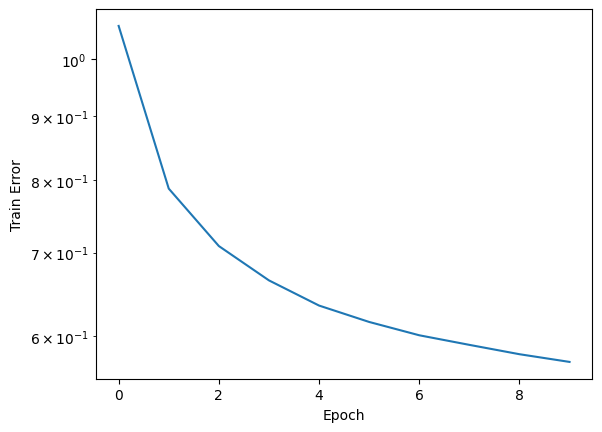

625/625 [==============================] - 1s 2ms/step


0.7783735011794605

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
history = model.fit([train.user_id, train.movie_id], train.rating, epochs=10)
pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.show()

y_hat = np.round(model.predict([test.user_id, test.movie_id]), decimals=2)
y_true = test.rating
mean_absolute_error(y_true, y_hat)